In [1]:
#Import Libraries
import cudf as pd
import cupy as cp
from cuml.ensemble import RandomForestClassifier as cuRFC
from cuml.metrics.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist
!pip install ipyplot &> /dev/null
print ("ipyplot installed sucessfully!!")
import matplotlib.pyplot as plt
import ipyplot
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ipyplot installed sucessfully!!


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(len(x_train))
print(len(x_test))
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

60000
10000
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)



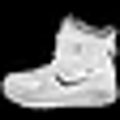
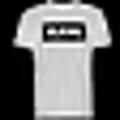
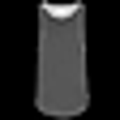
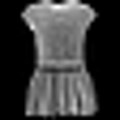


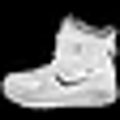
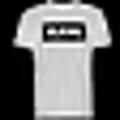
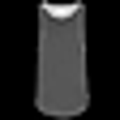
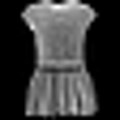

In [3]:
ipyplot.plot_images(x_train, max_images=4, img_width=120)

In [4]:
x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(len(x_test),784)
print(x_train.shape)
print(x_test.shape)
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 1)
(10000, 1)


In [5]:
RFC_model = cuRFC(max_features=1.0,
                   n_bins=10,
                   n_estimators=40)
RFC_model.fit(x_train.astype('float32'),y_train.astype('float32'))
RFC_predict = RFC_model.predict(x_test.astype('float32'))

In [6]:
y_test = y_test.reshape(1,len(y_test))[0]
print(y_test)
print(type(y_test))

[9 2 1 ... 8 1 5]
<class 'numpy.ndarray'>


In [7]:
accuracy_score(y_test,RFC_predict)

0.8652

In [8]:
confusion_matrix(y_test,RFC_predict)

array([[835,   1,  14,  34,   3,   1,  98,   1,  13,   0],
       [  5, 960,   1,  25,   2,   0,   6,   0,   1,   0],
       [ 11,   0, 785,  10, 127,   0,  58,   0,   9,   0],
       [ 21,   8,  15, 887,  38,   0,  29,   0,   2,   0],
       [  2,   2, 100,  36, 800,   1,  52,   0,   7,   0],
       [  0,   0,   0,   2,   0, 944,   0,  38,   4,  12],
       [134,   2, 125,  37,  87,   0, 595,   0,  20,   0],
       [  0,   0,   0,   0,   0,  16,   0, 942,   2,  40],
       [  2,   3,   7,   5,   5,   4,   8,   5, 958,   3],
       [  0,   0,   0,   0,   1,   8,   3,  42,   0, 946]])

In [9]:
print(classification_report(y_test,RFC_predict,zero_division=0))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.79      0.77      1000
           3       0.86      0.89      0.87      1000
           4       0.75      0.80      0.78      1000
           5       0.97      0.94      0.96      1000
           6       0.70      0.59      0.64      1000
           7       0.92      0.94      0.93      1000
           8       0.94      0.96      0.95      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.86      0.87      0.86     10000
weighted avg       0.86      0.87      0.86     10000

